<a href="https://colab.research.google.com/github/jimenezjos/Prueba-de-Promedios/blob/main/PruebadePromedios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación de la Prueba de los Promedios para Números Pseudoaleatorios

**Nombre del Estudiante:** Jiménez González José María

**Materia:** Simulación 1

## 1. Introducción teórica
La **Prueba de Promedios** es una prueba estadística que consiste en determinra si elconjunto de numero dados probienen de una distribución uniforme $x_i$ (($x_i) \sim U(0,1)$) es estadísticamente igual a la media esperada de 0.5.

### Hipótesis
* **$H_0$ (Nula):** $\mu_{r} = 0.5$ (Los números tienen la media correcta).
* **$H_1$ (Alternativa):** $\mu_{r} \neq 0.5$ (Los números no tienen la media correcta).

### Estadístico de Prueba ($Z_0$)
$$Z_0 = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

Donde:
* $\bar{x}$: Promedio de los datos.
* $\mu = 0.5$: Media esperada.
* $\sigma = \sqrt{\frac{1}{12}}$: Desviación estándar de una distribución uniforme (0,1).
* $n$: Cantidad de datos.

### Criterio de Aceptación
Si $|Z_0| < Z_{\alpha/2}$, no se rechaza $H_0$.

In [21]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
# Configuración de estilo para gráficos
plt.style.use('ggplot')

In [22]:
datos_np = [
0.78961, 0.05230, 0.10699, 0.55877, 0.14151,
0.76086, 0.12079, 0.27738, 0.65726, 0.79269,
0.80548, 0.82654, 0.29453, 0.20852, 0.42989,
0.58518, 0.98611, 0.34488, 0.34358, 0.11537,
0.89898, 0.57880, 0.67621, 0.05010, 0.00121,
0.28269, 0.73059, 0.70119, 0.18284, 0.49962,
0.38618, 0.76910, 0.68334, 0.55170, 0.10850,
0.79882, 0.45679, 0.21631, 0.87616, 0.55743,
0.58962, 0.33216, 0.03185, 0.61168, 0.09264,
0.69623, 0.17028, 0.05475, 0.91512, 0.76262,
0.29931, 0.30861, 0.83358, 0.51781, 0.03272,
0.57410, 0.26593, 0.85903, 0.43308, 0.35286,
0.24000, 0.65559, 0.38507, 0.90829, 0.94187,
0.93655, 0.88809, 0.81772, 0.36982, 0.19904,
0.54325, 0.62400, 0.09133, 0.41678, 0.33954,
0.58244, 0.85853, 0.86752, 0.38729, 0.15506,
0.23949, 0.53559, 0.33381, 0.49883, 0.75103,
0.19962, 0.65002, 0.74579, 0.79113, 0.63453,
0.19147, 0.40644, 0.08128, 0.73435, 0.22724,
0.22287, 0.07281, 0.64183, 0.44267, 0.72102
]

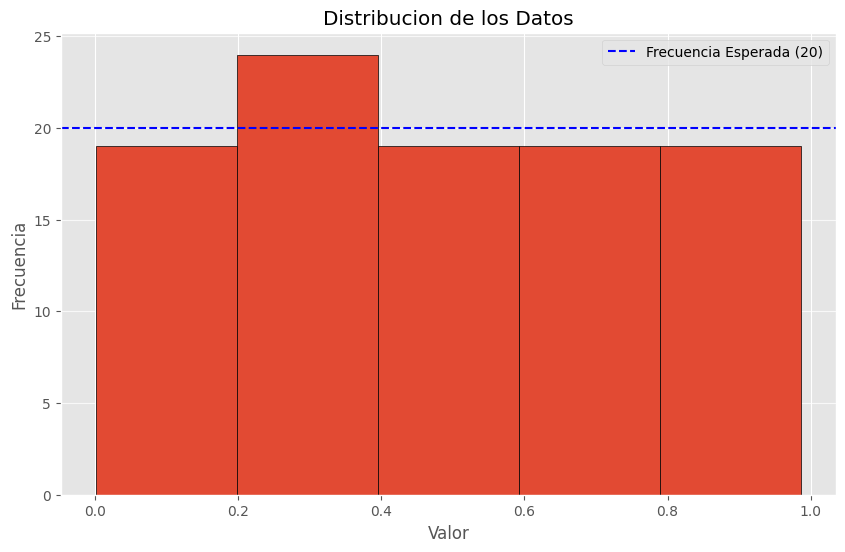

In [23]:
plt.figure(figsize=(10, 6))
plt.hist(datos_np, bins=5, edgecolor='black')
plt.title('Distribucion de los Datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

n_bins = 5  # Define n_bins based on the histogram configuration
expected_frequency = len(datos_np) / n_bins
plt.axhline(y=expected_frequency, color='blue', linestyle='--', label=f'Frecuencia Esperada ({expected_frequency:.0f})')
plt.legend()

plt.show()

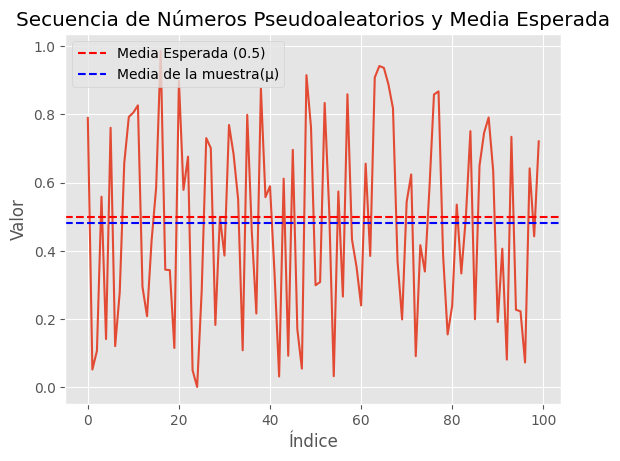

In [24]:
plt.plot(datos_np)
plt.axhline(y=0.5, color='r', linestyle='--', label='Media Esperada (0.5)')
plt.axhline(y=np.mean(datos_np), color='blue', linestyle='--', label='Media de la muestra(μ)')
plt.title('Secuencia de Números Pseudoaleatorios y Media Esperada')
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.legend()
plt.show()